In [1]:
from selenium import webdriver
import csv
import time
import os
from selenium.webdriver.common.keys import Keys
import pandas as pd
import re 
import numpy as np
import pprint # 출력 깔끔하게 하는 모듈

options = webdriver.ChromeOptions() 
options.add_argument('headless')  #크롬 옵션인데 창 보이게 할지 안할지 , 안보이게 하고 싶으면 chrome_options=options 입력
options.add_argument("lang=ko_KR")


In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl  # plot  관련 모듈
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE # T분포 확률적 임베딩 모듈

In [3]:
def wait(browser, sec):
    time.sleep(sec)
    browser.implicitly_wait(sec)
    
def ReEmoji(asd): # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', asd) 
    return result

def reMove(Fn):
    LA = [] # 해시태그 지우면서 띄우고, 그다음 하나씩 나누기
    for i in Fn['Post']:
        Fl = i.replace("#"," ")
        fl = Fl.split()
        LA.append(fl)
    LB = sum(LA, []) # 2중 리스트 지우기
    return LB

def re2list(맛집리스트):
    J = " ".join(맛집리스트)
    LC = ReEmoji(J)
    list_LC = LC.split()
    return list_LC

In [ ]:
driver_dir = 'C:\\Users\\John\\Anaconda3\\Scripts\\chromedriver'

A = []

query = input("* 검색어 입력: ")

times = int(input("* 게시물 개수 입력: "))
print("* 브라우저 실행 중...")
browser = webdriver.Chrome(driver_dir)
browser.get("https://www.instagram.com/explore/tags/{}".format(query))

wait(browser,2)

browser.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div/div[2]').click()

wait(browser, 5)

name = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/header/div[2]/div[1]/div[1]/h2/a').text
post = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/li[1]/div/div/div/span').text
post1 = post.replace('\n', ' ')
post2 = post1.replace('.', '')
List = [name, post2]
A.append(List)
browser.find_element_by_xpath('/html/body/div[4]/div[1]/div/div/a').click()                       
wait(browser,2)

Tryyy = 0 
while Tryyy < times:
    try:
        name = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/header/div[2]/div[1]/div[1]/h2/a').text
        post = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/li[1]/div/div/div/span').text
        post1 = post.replace('\n', ' ')
        post2 = post1.replace('.', '')
        Likes = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span').text
        List = [name, post2, Likes]
        A.append(List)
        browser.find_element_by_xpath('/html/body/div[4]/div[1]/div/div/a[2]').click()
        wait(browser,2)
        
        Tryyy= Tryyy + 1
        
    except:
        browser.find_element_by_xpath('/html/body/div[4]/div[1]/div/div/a[2]').click()
        wait(browser,2)
        

Col = ["Name", "Post", "Likes"]
df = pd.DataFrame.from_records(A, columns = Col)
dfX = df.drop_duplicates(['Name']) # 이름 중복 제거
dfY = dfX.drop_duplicates(['Post']) # 같은 글 중복 제거
Fn = pd.DataFrame.from_records(dfY, columns = Col) # 0번부터 재배열
Fn.to_excel(query + '.xlsx', sheet_name='sheet1') #excel 파일로 만들기


print("* 완료")

In [16]:
A # Crawling 결과물, 동영상은 자동으로 걸러짐

[['tindragooon',
  ' 제주도에 마라롱샤집 생겼다해서 한걸음에 달려옴 ㅋㅋㅋ 완전 만족함 !!   #제주맛집#서귀포맛집#올레시장맛집#제주맛집마라내음최고#제주도맛집#제주여행 #제주도여행 #이중섭거리맛집 #마라내음#서귀포마라내음#올레시장 #협재맛집 #제주마라롱샤 #천지연맛집',
  '265'],
 ['kb02178_',
  '인생맛집이네~~~망고아이스크림 진짜 생망고 맛 굿굿 #할로비치#한경면카페#한경면#제주여행#제주맛집#제주카페#제주도여행#제주시카페#할로비치짱짱#제주카페#제주도카페#중문맛집#제주도카페투어#협재카페 #한림카페#월정리카페#한경면맛집#협재맛집#제주도맛집#제주카페추천',
  '169'],
 ['s.eism_',
  '#영덕대게회수산물센터 활어회와 대게, 랍스터 등 맛있는 해산물을 즐길수 있는곳이에용 #제주도여행 #서귀포횟집 #서귀포맛집#제주도맛집#제주맛집#제주맛집영덕대게회수산물센터#제주올레시장맛집#중문맛집',
  '106'],
 ['islndgor_',
  '애들도 잘먹는다 ㅋㅋ 연탄x 참숯 👍🏻 #한림맛집#도민상회#흑돼지맛집 #제주맛집#애월맛집#애월고깃집 #제주고깃집#한림맛집도민상회짱 #협재맛집#도민상회본점#제주도맛집',
  '109'],
 ['yen1237_',
  '#돔베라면 국물이 진한게 아주 맛남 다른것도 다 맛있넹ㅋㅋ 제주분식 주소 제주시 귀아랑길 23 전화 064-726-2120 #제주분식#돔베덮밥#돔베매운라면#전복김밥#수제흑돈까스#돔베김밥제주도여행#제주가볼만한곳#제주도가볼만한곳#제주동문시장#동문시장맛집#연동제주분식#제주도민맛집#제주맛집#제주도맛집#먹스타#제주그램#제주살이#제주먹방',
  '175'],
 ['igongog7082_',
  '알록달록 예쁜 무거버거😋 건강한 재료에 맛까지 굿굿  #제주도카페투어#제주일상#함덕#jejudo#jeju#제주도맛집#함덕맛집무거버거짱#일상#제주살이#제주도살이#함덕해수욕장#함덕카페#함덕맛집#제주카페#제주도카페#제주도맛집추천#제주도민#제주도민맛집#제주도맛집#제주맛집#제주도여행',
  '180'

In [11]:
len(Fn)

481

In [17]:
Col = ["Name", "Post", "Likes"]
df = pd.DataFrame.from_records(A, columns = Col)
df

,Name,Post,Likes
0,tindragooon,제주도에 마라롱샤집 생겼다해서 한걸음에 달려옴 ㅋㅋㅋ 완전 만족함 !! #제주...,265
1,kb02178_,인생맛집이네~~~망고아이스크림 진짜 생망고 맛 굿굿 #할로비치#한경면카페#한경면#제...,169
2,s.eism_,"#영덕대게회수산물센터 활어회와 대게, 랍스터 등 맛있는 해산물을 즐길수 있는곳이에용...",106
3,islndgor_,애들도 잘먹는다 ㅋㅋ 연탄x 참숯 👍🏻 #한림맛집#도민상회#흑돼지맛집 #제주맛집#애...,109
4,yen1237_,#돔베라면 국물이 진한게 아주 맛남 다른것도 다 맛있넹ㅋㅋ 제주분식 주소 제주시 귀...,175
5,igongog7082_,알록달록 예쁜 무거버거😋 건강한 재료에 맛까지 굿굿 #제주도카페투어#제주일상#함덕...,180
6,075_sol_,함덕에 이렇게 이쁜곳이 있는지 몰랐넹ㅋㅋㅋ 마늘이랑 당근이랑 시금치가 들어간 무거버...,169
7,sugsoon0505_,우럭정식을 정말 제대로 된 집에서 완벽하게 먹고 싶을 땐! 로컬맛집 #월정어촌계식당...,126
8,astre2345,말이 필요없는 엄지척 맛집 #정직한돈 고기맛반함주의♥ #먹스타그램 #애월읍...,347
9,ghoo7685ff,🔸 만덕이네 식당 👉 ☎ : 064-787-3827 주소 : 제주 서귀포시 표선면 ...,2


In [18]:
dfX = df.drop_duplicates(['Name']) # 이름 중복 제거
dfY = dfX.drop_duplicates(['Post']) # 같은 글 중복 제거
Fn = pd.DataFrame.from_records(dfY, columns = ["Name", "Post", "Likes"]) # 0번부터 재배열
Fn

,Name,Post,Likes
0,tindragooon,제주도에 마라롱샤집 생겼다해서 한걸음에 달려옴 ㅋㅋㅋ 완전 만족함 !! #제주...,265
1,kb02178_,인생맛집이네~~~망고아이스크림 진짜 생망고 맛 굿굿 #할로비치#한경면카페#한경면#제...,169
2,s.eism_,"#영덕대게회수산물센터 활어회와 대게, 랍스터 등 맛있는 해산물을 즐길수 있는곳이에용...",106
3,islndgor_,애들도 잘먹는다 ㅋㅋ 연탄x 참숯 👍🏻 #한림맛집#도민상회#흑돼지맛집 #제주맛집#애...,109
4,yen1237_,#돔베라면 국물이 진한게 아주 맛남 다른것도 다 맛있넹ㅋㅋ 제주분식 주소 제주시 귀...,175
5,igongog7082_,알록달록 예쁜 무거버거😋 건강한 재료에 맛까지 굿굿 #제주도카페투어#제주일상#함덕...,180
6,075_sol_,함덕에 이렇게 이쁜곳이 있는지 몰랐넹ㅋㅋㅋ 마늘이랑 당근이랑 시금치가 들어간 무거버...,169
7,sugsoon0505_,우럭정식을 정말 제대로 된 집에서 완벽하게 먹고 싶을 땐! 로컬맛집 #월정어촌계식당...,126
8,astre2345,말이 필요없는 엄지척 맛집 #정직한돈 고기맛반함주의♥ #먹스타그램 #애월읍...,347
9,ghoo7685ff,🔸 만덕이네 식당 👉 ☎ : 064-787-3827 주소 : 제주 서귀포시 표선면 ...,2


In [23]:
LA = [] # 해시태그 지우면서 띄우고, 그다음 하나씩 나누기
for i in Fn['Post']:
    Fl = i.replace("#"," ")
    fl = Fl.split()
    LA.append(fl)
LB = sum(LA, []) # 2중 리스트 지우기  이 스크립트는 함수 안될까봐 쫄려서 냅둠

In [25]:
re2list(LB) == re2list(reMove(Fn)) # 잘 된건가 확인

True

In [6]:
# 이건 껐다 켰는데 크롤 자료가 있다면 하단부터 시작

In [19]:
마라탕 = pd.read_excel("마라탕.xlsx")
마카롱 = pd.read_excel("마카롱.xlsx")
떡볶이 = pd.read_excel("떡볶이.xlsx")
스시 = pd.read_excel("스시.xlsx")
냉면 = pd.read_excel("냉면.xlsx")
print(len(마라탕), len(마카롱), len(떡볶이), len(스시), len(냉면))

665 616 646 512 630


In [25]:
마카롱

,Name,Post,Likes
0,scoop_dang_bakery,#스쿱당 #마카롱 솟아랏 크림크림💛 여러분 기다려주셔서 정말 감사해요🙊🙊❤️ 내일부...,699
1,happyzzzsus,5:30전체품절로 매장 마감했습니다❤️ 오늘도 많이 방문해주셔서 너무너무 감사합니다...,106
2,sweet_signal,톡톡 터지는 딥가나슈💕 오늘 예약픽업은 5시까지 가능해용 참고해주세요😍 6월 2일...,135
3,delicake_flower,🍭🍭 #마카롱창업반클래스 오늘두 많은얘기들을 나누며 클래스종료🙊 담주 또또볼거니깐...,315
4,gogothink324,커피셀러 마카롱 클래스 직접 만든 마카롱을 선물하세요^^ 커피셀러 마카롱클래스 문의...,119
5,o.f.y.o.u,일요일 오픈했습니다 ~~~ ❣️ / ♥ 마카롱 • 소금바닐라 • 죠리퐁 • 고구마케...,109
6,routine759,🌷마카롱 라인업 베리베리롱🍓🍓 베리베리롱🍇🍓 돼지바 누텔라크림치즈 딸기크림치즈 발...,125
7,somimood,#소미무드 #다쿠아즈 일요일 라인업입니다 ❤️ 월화 휴무이니 오늘 많이 방문해주세요...,404
8,clickshes,#에프터눈티 #집에서 #카페놀이 #형형색색❤️💛💚💙 #예쁜마카롱 #스타벅스컵 #스타...,2
9,kkabi_park0319,キャラメルバナナマカロンと ベイクドチーズケーキ (카라멜바나나마카롱과구운치즈케익🍰) #...,2


In [20]:
마라탕 = 마라탕.drop(마라탕.index[500:])
마카롱 = 마카롱.drop(마카롱.index[500:])
떡볶이 = 떡볶이.drop(떡볶이.index[500:])
스시 = 스시.drop(스시.index[500:])
냉면 = 냉면.drop(냉면.index[500:])
print(len(마라탕), len(마카롱), len(떡볶이), len(스시), len(냉면)) #게시물 각 500개로 통일

500 500 500 500 500


In [12]:
마카롱

,Name,Post
0,마카롱,#스쿱당 #마카롱 솟아랏 크림크림💛 여러분 기다려주셔서 정말 감사해요🙊🙊❤️ 내일부...
1,마카롱,5:30전체품절로 매장 마감했습니다❤️ 오늘도 많이 방문해주셔서 너무너무 감사합니다...
2,마카롱,톡톡 터지는 딥가나슈💕 오늘 예약픽업은 5시까지 가능해용 참고해주세요😍 6월 2일...
3,마카롱,🍭🍭 #마카롱창업반클래스 오늘두 많은얘기들을 나누며 클래스종료🙊 담주 또또볼거니깐...
4,마카롱,커피셀러 마카롱 클래스 직접 만든 마카롱을 선물하세요^^ 커피셀러 마카롱클래스 문의...
5,마카롱,일요일 오픈했습니다 ~~~ ❣️ / ♥ 마카롱 • 소금바닐라 • 죠리퐁 • 고구마케...
6,마카롱,🌷마카롱 라인업 베리베리롱🍓🍓 베리베리롱🍇🍓 돼지바 누텔라크림치즈 딸기크림치즈 발...
7,마카롱,#소미무드 #다쿠아즈 일요일 라인업입니다 ❤️ 월화 휴무이니 오늘 많이 방문해주세요...
8,마카롱,#에프터눈티 #집에서 #카페놀이 #형형색색❤️💛💚💙 #예쁜마카롱 #스타벅스컵 #스타...
9,마카롱,キャラメルバナナマカロンと ベイクドチーズケーキ (카라멜바나나마카롱과구운치즈케익🍰) #...


In [21]:
del 마라탕["Likes"]
마라탕["Name"] = "마라탕"

del 마카롱["Likes"]
마카롱["Name"] = "마카롱"

del 떡볶이["Likes"]
떡볶이["Name"] = "떡볶이"

del 스시["Likes"]
스시["Name"] = "스시"

del 냉면["Likes"]
냉면["Name"] = "냉면"

In [22]:
마라탕.fillna(" ")
마카롱.fillna(" ")
떡볶이.fillna(" ")
스시.fillna(" ")
냉면.fillna(" ") # NAN 제거

,Name,Post
0,냉면,#하면옥 #포항 #냉면 #갈비찜 푸짐하게 한상!! #양덕동맛집#포항양덕동#포항양덕맛...
1,냉면,시원한 물냉면 #물냉면 #오장동함흠냉면 #2번째방문 #맛집 #행복해 #jmt ...
2,냉면,#필동면옥#평양냉면#냉면#물냉면#제육#접시만두#면스타그램#먹스타그램 #이러다의정부까...
3,냉면,묘한 맛이네 #진주냉면 #비빔밥 평양냉면 좋아하는 사람은 좋아할꺼라는 말에 바로 고...
4,냉면,냉면엔갈비지 #갈비 #돼지갈비 #냉면 #아기 #신방동4살통 #아들 #육아 #육아소통...
5,냉면,#마트 떨어진재료만 사러갔는데 일케안사려고하는날은 소세지 3천원할인에 계란할인 냉...
6,냉면,🐷#백년식당 #시흥본점 저번에 #암퇘지 #꽃삼겹살 먹었으니 이번엔 🍯#백년꿀갈비 ...
7,냉면,여름에는 역시 얼음 동동 시원한 물냉면! 풀무원 물냉은 맛이 두 개여서 골라먹을 수...
8,냉면,부산 소고기 먹방 버-억 환타랑 쓰까먹는 쇠주 #먹스타그램 #육회 #등심 #냉면 ...
9,냉면,#불금 #저녁 #집밥 #한우투뿔 #관자 #냉면 #묵자 #만지면물어요


In [23]:
F_list = pd.DataFrame.from_records(마라탕.fillna(" ").append(마카롱.fillna(" ")).append(떡볶이.fillna(" ")).append(스시.fillna(" ")).append(냉면.fillna(" ")))
F_list

,Name,Post
0,마라탕,마라탕 먹으러 왓찌용 💃🏻💃🏻💃🏻💃🏻💃🏻💕🔥👯‍♂️👯‍♂️👯‍♂️👯‍♂️👯‍♂️👯‍♂️
1,마라탕,매일매일 오늘 같은 날씨라면💕 기분좋으니까 오늘 저녁은 마라탕‼️ #신림카페 #마라...
2,마라탕,푸짐한 상차림ㅋㅋ 마라우육면 또 먹고싶다🤤 #미엔아이#마라탕맛집#마라중독#잠...
3,마라탕,히쭈구리 홍대와따!!뾰뀨!!!!!!! 초딩놀이 성공!!😎🤟🏻
4,마라탕,"‘麻辣燙’ 내 인생 첫 마라탕 이제야 알았다 안먹어본 사람은 있어도, 한 번 먹어도..."
5,마라탕,"❤️테이스티로드, 굿모닝 대한민국에서 인정한 맛집 모우모우 ^^ ~💕 이태원점 👏홍..."
6,마라탕,"❤️테이스티로드, 굿모닝 대한민국에서 인정한 맛집 모우모우 ^^ ~💕 이태원점 👏홍..."
7,마라탕,마라탕 처음먹어봤는데 내취향저격~~~ 중국당면도 들어있어요😍 ✅객리단길 도첸 주소:...
8,마라탕,"✏️홍화마라탕 진짜 요즘 끊임없이 먹고있는 마라,, 이정도면 마라수혈 맞습니다🔥🔥..."
9,마라탕,왜 다들 그렇게 마라탕마라탕하는지 이제 알겠어요존맛탱🙊 #마라탕 #커피에반하다...


F_list = pd.DataFrame.from_records(마라탕.append(마카롱).append(떡볶이).append(스시).append(냉면)))
F_list

In [8]:
# pd 의 post 이모지를 한번에 제거하고 싶었음

def Noemoji(A):
    j = ReEmoji(A)
    return j

In [24]:
j = []
for i in F_list["Post"]:
    z = ReEmoji(i)
    j.append(z)

In [12]:
F_list["Post"] = j

In [13]:
F_list # 이모지 지운 F_list

,Name,Post
0,마라탕,마라탕 먹으러 왓찌용
1,마라탕,매일매일 오늘 같은 날씨라면 기분좋으니까 오늘 저녁은 마라탕 신림카페 마라탕 보라매
2,마라탕,푸짐한 상차림ㅋㅋ 마라우육면 또 먹고싶다 미엔아이마라탕맛집마라중독잠실역맛집잠...
3,마라탕,히쭈구리 홍대와따뾰뀨 초딩놀이 성공
4,마라탕,내 인생 첫 마라탕 이제야 알았다 안먹어본 사람은 있어도 한 번 먹어도 본 사람은...
5,마라탕,테이스티로드 굿모닝 대한민국에서 인정한 맛집 모우모우 이태원점 홍대점 핵존맛 요...
6,마라탕,테이스티로드 굿모닝 대한민국에서 인정한 맛집 모우모우 이태원점 홍대점 핵존맛 요...
7,마라탕,마라탕 처음먹어봤는데 내취향저격 중국당면도 들어있어요 객리단길 도첸 주소 전라북도 ...
8,마라탕,홍화마라탕 진짜 요즘 끊임없이 먹고있는 마라 이정도면 마라수혈 맞습니다 치킨 처럼...
9,마라탕,왜 다들 그렇게 마라탕마라탕하는지 이제 알겠어요존맛탱 마라탕 커피에반하다 흑당...


In [ ]:
#밑에서부터는 추출한 것들 한국어 자연어 처리기로 토큰화 하고 모델 학습

In [214]:
from soynlp.word import WordExtractor # 언어는 soynlp, 띄어쓰기 기반 토큰화기 때문에 고유 명사 추출이 좀더 쉽다
from soynlp.tokenizer import LTokenizer
from gensim.models import Word2Vec
import gensim.models as g

Post_by_hashtag = F_list['Post'].tolist()
word_extractor = WordExtractor(min_frequency=10) # soynlp에서는 빈도수와 관련 된 parameter는 frequency로 통일
word_extractor.train(Post_by_hashtag)
word_scores = word_extractor.extract()

cohesion_scores = {word:score.cohesion_forward for word, score in word_scores.items()}
ltokenizer = LTokenizer(scores = cohesion_scores)
word2vec_corpus = [ltokenizer.tokenize(sent, remove_r=True) for sent in Post_by_hashtag]

Hashtag = F_list['Name'].tolist()

new_word2vec_corpus = []
for i in range(0, len(Post_by_hashtag)):
    k = word2vec_corpus[i]
    k.append(str(Hashtag[i]))
    new_word2vec_corpus.append(k) 

model = Word2Vec(new_word2vec_corpus, size=600, window=10, min_count=10, workers=4, iter=25, sg=1)
#차원 = 600 주변 단어는 10개, 출현빈도 최소 10회, cpu 스레드는 4개, 반복횟수는 25회, 방법론은 CBOW와 Skip-Gram중 후자 선택
model_name = 'By_soynlp'
model.save(model_name)

training was done. used memory 0.277 Gbry 0.273 Gb
all cohesion probabilities was computed. # words = 1895
all branching entropies was computed # words = 6232
all accessor variety was computed # words = 6232


In [215]:
model = g.Word2Vec.load(model_name)
print(model.most_similar(positive='마라탕')) # '마라탕' = 인스타 검색어 , topn = n 으로 개수 정할 수 있다.

[('라화쿵부', 0.7522454261779785), ('마라', 0.7438477277755737), ('칭따오', 0.6787527799606323), ('꿔바', 0.656664252281189), ('배곧', 0.6508069038391113), ('라공방', 0.6310368180274963), ('탕화쿵푸', 0.6276648044586182), ('건대맛집', 0.6258741617202759), ('중식', 0.622578501701355), ('중국', 0.6143231391906738)]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [216]:
model = g.Word2Vec.load(model_name)
print(model.most_similar(positive='마카롱'))

[('디저트', 0.6007265448570251), ('별내', 0.5828319787979126), ('만나요', 0.5645978450775146), ('쿠키', 0.560280442237854), ('꼬끄', 0.5542232990264893), ('다쿠아즈', 0.552692711353302), ('베이킹', 0.5488228797912598), ('서디페', 0.5484058260917664), ('머랭쿠키', 0.5395300984382629), ('뚱카롱', 0.5368459820747375)]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [217]:
model = g.Word2Vec.load(model_name)
print(model.most_similar(positive='떡볶이'))

[('감자튀김', 0.6973191499710083), ('오뎅', 0.6322659254074097), ('분식', 0.6041689515113831), ('김말이', 0.5965665578842163), ('신전', 0.5937985181808472), ('순대', 0.5844317078590393), ('짜장', 0.5833888053894043), ('신전떡볶이', 0.5797581672668457), ('두끼', 0.5680972933769226), ('년생', 0.5678763389587402)]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [218]:
model = g.Word2Vec.load(model_name)
print(model.most_similar(positive='스시'))

[('초밥', 0.7935377359390259), ('일식', 0.6607743501663208), ('오마카세', 0.6481770873069763), ('회전초밥', 0.6347014904022217), ('회', 0.6138845682144165), ('사케', 0.6053600311279297), ('이자카야', 0.5752749443054199), ('참치', 0.5712895393371582), ('런치', 0.5613678097724915), ('사시미', 0.56013023853302)]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [186]:
model = g.Word2Vec.load(model_name)
print(model.most_similar(positive='냉면'))

[('물냉', 0.697830319404602), ('비냉', 0.6861864924430847), ('비빔냉면', 0.6801255941390991), ('물냉면', 0.6274563074111938), ('회냉면', 0.6247665882110596), ('진주냉면', 0.6022550463676453), ('시원하', 0.5968769192695618), ('함흥냉면', 0.5862360000610352), ('여름', 0.5625839233398438), ('메밀', 0.5610401630401611)]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [228]:
vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X[:800,:]) #1000개 

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


909
[-3.0384275e-01  1.5746388e-01  2.5967678e-01  1.7578330e-02
  1.3777281e-01  1.5479313e-01 -1.8252283e-01 -2.2873988e-03
 -2.6180313e-04 -1.0363814e-02]


In [229]:
Dim = pd.DataFrame(X_tsne, index=vocab[:800], columns=['x', 'y']) 
Dim.shape

(800, 2)

In [84]:
path = 'C:/Windows/Fonts/gulim.ttc'  # 굴림체 굳
fontprop = fm.FontProperties(fname=path, size=6) # 여기서 폰트 설정을 따로 해놔야 안깨짐
print(fontprop)
fm._rebuild()

:family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=C:/Windows/Fonts/gulim.ttc:size=6.0


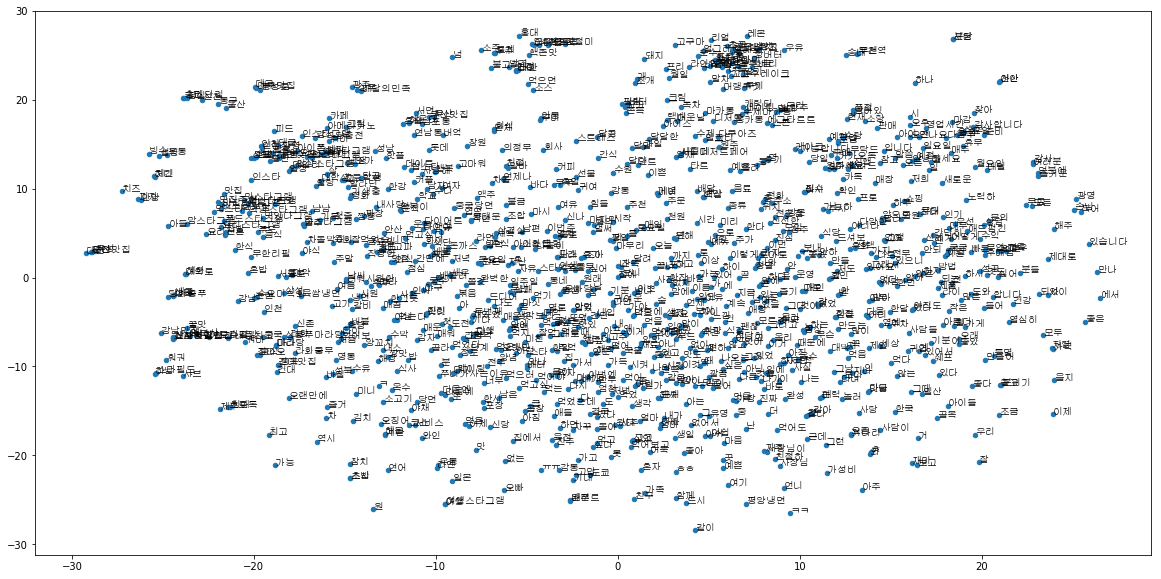

In [22]:
path = 'C:/Windows/Fonts/gulim.ttc'
plt.figure(figsize=(20,10))
fontprop = fm.FontProperties(fname=path, size=10)
plt.scatter(Dim['x'], Dim['y'], s = 20)
for word, pos in Dim.iterrows():
    plt.annotate(word, pos, fontProperties =fontprop)
    
plt.show()

In [110]:
model.init_sims(replace=True) # 메모리 잡아먹지 말라고 종료

In [21]:
from gensim.models import word2vec

print(word2vec.FAST_VERSION) ## will be slow.. 문제 확인차 버전 점검함

1


In [230]:
#새창
%matplotlib qt5
path = 'C:/Windows/Fonts/gulim.ttc'
plt.figure(figsize=(20,10))
fontprop = fm.FontProperties(fname=path, size=7)
plt.scatter(Dim['x'], Dim['y'], s = 20)
for word, pos in Dim.iterrows():
    plt.annotate(word, pos, fontProperties =fontprop)
    
plt.show()